# PROYECTO SPRINT 10
"La toma de decisiones de negocios basadas en datos."

A continuación, presento la **estructura detallada del proyecto** que desarrollaremos, siguiendo las mejores prácticas de programación, documentación y análisis.

## Parte 1. Priorización de hipótesis 💡

En esta sección, nos centraremos en el archivo `hypotheses_us.csv`. El objetivo es aplicar los frameworks ICE y RICE para priorizar las hipótesis de negocio que pueden aumentar los ingresos de la tienda online.

### 1.1. Carga y preparación de datos

Primero, cargaremos el archivo `hypotheses_us.csv` en un DataFrame de pandas. Después de esto, la tabla estará lista para ser analizada. Aplicaremos metodos como snake_case, lowercase, strip; para un correcto prosesamiento de Datos; Verificaremos, Valores Ausentes y Valores Duplicados. 

In [1]:
# Importamos la librería pandas, esencial para el manejo y análisis de datos.
import pandas as pd

# Definimos la ruta del archivo CSV.
DATASET_PATH_HYPOTHESES = '/datasets/hypotheses_us.csv'

# Cargamos el dataset en un DataFrame.
# Utilizamos sep=',' para indicar que las columnas están separadas por comas.
hypotheses_df = pd.read_csv(DATASET_PATH_HYPOTHESES, sep=';')

# Mostramos el DataFrame completo.
# No es necesario usar head() ya que el dataset es pequeño y queremos ver todas las hipótesis.
print("--- DataFrame de Hipótesis ---")
print(hypotheses_df)
print("\n")

# Mostramos la información del DataFrame para verificar tipos de datos y valores nulos.
print("--- Información del DataFrame ---")
hypotheses_df.info()
print("\n")

# Limpieza de los nombres de columnas
hypotheses_df.columns = hypotheses_df.columns.str.strip().str.replace(' ', '_').str.lower()

# Mostramos los nombres de columnas para verificar que estan escritos correctamente. 
print("--- Nombre de las Columnas del DataFrame ---")
print(hypotheses_df.columns.tolist())

--- DataFrame de Hipótesis ---
                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   
5  Add a customer review page. This will increase...      3       2   
6  Show banners with current offers and sales on ...      5       3   
7  Add a subscription form to all the main pages....     10       7   
8  Launch a promotion that gives users discounts ...      1       9   

   Confidence  Effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  
5           2       3  
6           8       3  
7           8       5  
8           9       5  


--- Información 

### 1.2. Priorización con el framework ICE

El framework ICE (Impacto, Confianza, Esfuerzo) se calcula con la fórmula:
`ICE= Impacto × Confianza / Esfuerzo`
Aplicaremos esta fórmula a cada hipótesis, creando una nueva columna `ICE` en el DataFrame. Luego, ordenaremos las hipótesis de mayor a menor puntuación para identificar las más prometedoras según este método.

In [2]:
# Aplicamos la fórmula ICE y creamos una nueva columna ice_score.
hypotheses_df['ice_score'] = (hypotheses_df['impact'] * hypotheses_df['confidence']) / hypotheses_df['effort']

# Ordenamos el DataFrame de forma descendente por el puntaje ICE.
# Usamos sort_values con ascending=False.
hypotheses_df_ice = hypotheses_df.sort_values(by='ice_score', ascending=False)

# Mostramos las hipótesis priorizadas.
print("--- Hipótesis Priorizadas por ICE ---")
print(hypotheses_df_ice[['hypothesis', 'ice_score']])

--- Hipótesis Priorizadas por ICE ---
                                          hypothesis  ice_score
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


**Análisis de los Resultados:**
El resultado muestra una lista de hipótesis ordenadas de mayor a menor según su puntaje `ICE`. 
La hipótesis con el puntaje más alto es la más recomendada para implementar primero porque ofrece el mejor retorno de la inversión. Esto se debe a que tiene el mayor impacto y confianza, y el menor esfuerzo.

* **Hipótesis de Alta Prioridad:** La hipótesis con el puntaje más alto, `Launch a promotion that gives users discounts (16.2)`, es la más atractiva. Sugiere que lanzar promociones tendrá un gran impacto en los objetivos, se tiene alta confianza en que funcionará, y el esfuerzo requerido para implementarla es relativamente bajo.

* **Hipótesis de Media Prioridad:** La siguiente en la lista, `Add two new channels for attracting traffic (13.33)`, también es una buena candidata. Aunque su puntaje es menor, sigue siendo una opción con un buen balance de impacto y esfuerzo.

* **Hipótesis de Baja Prioridad:** Las hipótesis con puntajes bajos, como `Change the background color on the main page (1.0)`, se consideran de baja prioridad. Su puntaje bajo puede deberse a un impacto esperado pequeño, poca confianza en que la iniciativa funcione, o un esfuerzo de implementación muy alto. Es recomendable no invertir recursos en estas hipótesis hasta que las de mayor prioridad se hayan completado.

**En conclusión,** este análisis nos muestra un camino calro: nos enfocaremos en las hipótesis de mayor puntaje `ICE` para maximizar los resultados. La hipótesis de `"lanzar una promoción"` es la acción recomendada para iniciar.

### 1.3. Priorización con el framework RICE

El framework **RICE** (Alcance, Impacto, Confianza, Esfuerzo) es una versión mejorada de ICE que añade un componente clave: el alcance (`Reach`). Se calcula con la fórmula:
`RICE= Alcance × Impacto × Confianza / Esfuerzo`
De manera similar, crearemos una nueva columna `RICE` y ordenaremos las hipótesis en orden descendente. El `Reach` es un factor crítico, ya que una hipótesis con un gran impacto y confianza pero que solo afecta a un pequeño número de usuarios (`Reach` bajo) tendrá menos prioridad que una que afecte a una gran porción de la audiencia.

In [3]:
# Aplicamos la fórmula RICE y creamos una nueva columna 'rice_score'.
hypotheses_df['rice_score'] = (hypotheses_df['reach'] * hypotheses_df['impact'] * hypotheses_df['confidence']) / hypotheses_df['effort']

# Ordenamos el DataFrame de forma descendente por el puntaje RICE.
hypotheses_df_rice = hypotheses_df.sort_values(by='rice_score', ascending=False)

# Mostramos las hipótesis priorizadas.
print("--- Hipótesis Priorizadas por RICE ---")
print(hypotheses_df_rice[['hypothesis', 'rice_score']])

--- Hipótesis Priorizadas por RICE ---
                                          hypothesis  rice_score
7  Add a subscription form to all the main pages....       112.0
2  Add product recommendation blocks to the store...        56.0
0  Add two new channels for attracting traffic. T...        40.0
6  Show banners with current offers and sales on ...        40.0
8  Launch a promotion that gives users discounts ...        16.2
3  Change the category structure. This will incre...         9.0
1  Launch your own delivery service. This will sh...         4.0
5  Add a customer review page. This will increase...         4.0
4  Change the background color on the main page. ...         3.0


**Análisis de los Resultados:**
El resultado muestra una nueva priorización de las hipótesis que puede ser muy diferente a la del método ICE, ya que se toma en cuenta el número de personas a las que impactará la iniciativa.

* **Nueva Hipótesis Principal:** La hipótesis `"Add a subscription form to all the main pages"` sube a la primera posición con un puntaje de 112.0. Esto indica que, aunque su impacto y confianza podrían no haber sido los más altos en el análisis ICE, su enorme alcance la convierte en la opción más valiosa para implementar.

* **Revalorización de Hipótesis:** Otras hipótesis, como `"Add product recommendation blocks" (56.0)` y `"Add two new channels" (40.0)`, también se elevan en la lista, lo que sugiere que tienen un buen equilibrio entre alcance, impacto y confianza, y un esfuerzo manejable.

* **Hipótesis que bajan de prioridad:** La hipótesis `"Launch a promotion that gives users discounts"`, que era la número uno en el análisis ICE, **cae al quinto lugar con un puntaje de 16.2**. Esto sucede porque, a pesar de su alto impacto, es probable que su alcance sea más limitado que el de otras iniciativas.

**En resumen**, la conclusión principal es que la hipótesis de agregar un formulario de suscripción es la que tiene mayor potencial de generar valor al llegar a la mayor cantidad de usuarios, por lo que debe ser la primera en implementarse.

### 1.4. Comparación y conclusiones

Compararemos los resultados de ambos métodos de priorización. Explicaremos cómo la inclusión del factor alcance (`Reach`) cambia el ranking de las hipótesis. Una hipótesis con un alto puntaje ICE podría caer en la clasificación RICE si su alcance es bajo, y viceversa. Esta sección incluirá un análisis detallado de los cambios y el razonamiento detrás de ellos.

In [4]:
# Creamos una columna de ranking para ICE y RICE.
# rank(ascending=False)` asigna un ranking basado en los valores, de mayor a menor.
hypotheses_df['ice_rank'] = hypotheses_df['ice_score'].rank(ascending=False)
hypotheses_df['rice_rank'] = hypotheses_df['rice_score'].rank(ascending=False)

# Seleccionamos las columnas relevantes para la comparación y las ordenamos por el ranking RICE.
# El ranking RICE es generalmente más completo para la toma de decisiones.
comparison_df = hypotheses_df[['hypothesis', 'ice_score', 'ice_rank', 'rice_score', 'rice_rank']].sort_values(by='rice_rank')

print("--- Comparación de Priorización ICE vs. RICE ---")
print(comparison_df)

--- Comparación de Priorización ICE vs. RICE ---
                                          hypothesis  ice_score  ice_rank  \
7  Add a subscription form to all the main pages....  11.200000       3.0   
2  Add product recommendation blocks to the store...   7.000000       5.0   
0  Add two new channels for attracting traffic. T...  13.333333       2.0   
6  Show banners with current offers and sales on ...   8.000000       4.0   
8  Launch a promotion that gives users discounts ...  16.200000       1.0   
3  Change the category structure. This will incre...   1.125000       8.0   
1  Launch your own delivery service. This will sh...   2.000000       6.0   
5  Add a customer review page. This will increase...   1.333333       7.0   
4  Change the background color on the main page. ...   1.000000       9.0   

   rice_score  rice_rank  
7       112.0        1.0  
2        56.0        2.0  
0        40.0        3.5  
6        40.0        3.5  
8        16.2        5.0  
3         9.0     

**Diferencias entre los Métodos RICE e ICE**
La principal diferencia entre ambos métodos radica en la inclusión de la variable alcance (Reach) en el cálculo.

**ICE (Impacto, Confianza, Esfuerzo):** Se enfoca en el retorno esperado de una iniciativa (Impacto y Confianza) frente a su costo de implementación (Esfuerzo). Es útil cuando todas las hipótesis se dirigen a un público similar o cuando el alcance no es un factor determinante. Sin embargo, puede dar prioridad a iniciativas con un gran impacto, pero que solo benefician a una pequeña fracción de los usuarios.

**RICE (Alcance, Impacto, Confianza, Esfuerzo):** Corrige el sesgo del método ICE al incluir el alcance. Esto garantiza que las iniciativas priorizadas no solo tengan un gran impacto potencial, sino que también lleguen a un número significativo de usuarios. Es ideal para empresas o productos con una gran base de usuarios, donde una pequeña mejora a gran escala puede tener un efecto masivo.

La elección entre ICE y RICE depende de nuestros objetivos. Si el alcance es un factor crítico para el éxito de tus iniciativas, el método RICE tendrá una priorización más precisa y estratégica.

## Parte 2. Análisis del test A/B 📊

En esta parte, trabajaremos con los archivos `orders_us.csv` y `visits_us.csv` para analizar los resultados de una prueba A/B. El objetivo es determinar si la nueva versión (grupo B) es significativamente mejor que la versión actual (grupo A).

### 2.1. Carga y preprocesamiento de los datos

Cargaremos los dos datasets y realizaremos una limpieza inicial. El paso más importante será identificar a los usuarios que pertenecen a ambos grupos de prueba y eliminarlos, ya que estos "usuarios de grupos mixtos" pueden sesgar los resultados de la prueba.

In [5]:
# Importamos librerías necesarias.
import pandas as pd
import datetime as dt

# Definimos las rutas de los datasets.
DATASET_PATH_ORDERS = '/datasets/orders_us.csv'
DATASET_PATH_VISITS = '/datasets/visits_us.csv'

# Cargamos los datos.
orders_df = pd.read_csv(DATASET_PATH_ORDERS)
visits_df = pd.read_csv(DATASET_PATH_VISITS)

# Limpieza de los nombres de columnas
orders_df.columns = orders_df.columns.str.strip().str.replace(' ', '_').str.lower()
visits_df.columns = visits_df.columns.str.strip().str.replace(' ', '_').str.lower()

# Mostramos los nombres de columnas para verificar que estan escritos correctamente. 
print("--- Nombre de las Columnas del DataFrame ---")
print(orders_df.columns.tolist())
print(visits_df.columns.tolist())
print("\n")

# Convertimos la columna 'date' a formato de fecha y hora.
orders_df['date'] = orders_df['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visits_df['date'] = visits_df['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

# --- Preprocesamiento: Identificar y eliminar usuarios duplicados ---
# Agrupamos por 'visitorId' y contamos los grupos a los que pertenecen.
# Esto nos ayuda a encontrar a los usuarios que están en más de un grupo.
visitors_by_group = orders_df.groupby('visitorid')['group'].nunique()
# Filtramos para obtener solo los 'visitorId' con más de un grupo (o sea, 2).
duplicates_visitors = visitors_by_group[visitors_by_group > 1].index

# Eliminamos los usuarios duplicados de ambos DataFrames.
orders_cleaned = orders_df[~orders_df['visitorid'].isin(duplicates_visitors)]
#visits_cleaned = visits_df[~visits_df['visits'].isin(duplicates_visitors)] #OJO 'visits'
visits_cleaned = visits_df.copy()

print("--- Información de los DataFrames Originales ---")
print(orders_df.info())
print("\n")
print(visits_df.info())

print("\n")
print("--- Número de usuarios que se eliminaron ---")
print(f"Total de usuarios duplicados: {len(duplicates_visitors)}")
print(f"Total de pedidos eliminados: {len(orders_df) - len(orders_cleaned)}")
print(f"Total de visitas eliminadas: {len(visits_df) - len(visits_cleaned)}")

print("\n")
print("--- Información de los DataFrames Limpios ---")
print(orders_cleaned.info())
print("\n")
print(visits_cleaned.info())

--- Nombre de las Columnas del DataFrame ---
['transactionid', 'visitorid', 'date', 'revenue', 'group']
['date', 'group', 'visits']


--- Información de los DataFrames Originales ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     ob

**Análisis de los Resultados**
Los resultados que proporcionas confirman que el código cumplió su objetivo. Aquí está un desglose de lo que significan estos resultados:

* **Identificación de usuarios duplicados:** El código encontró 58 usuarios que formaban parte de ambos grupos (A y B) del experimento.

* **Limpieza de datos:** Se eliminaron 181 pedidos que estaban asociados a esos usuarios duplicados. Esto es crucial porque estos pedidos habrían distorsionado los resultados de tu prueba A/B, haciendo que las diferencias entre los grupos parecieran menos significativas de lo que realmente son.

**DataFrame visits_df sin cambios:** El mensaje Total de visitas eliminadas: 0. Aunque no estoy del todo seguro vamos a corroborar que esto sea cierto. 

In [6]:
# Verificamos si hay valores nulos en DataFrame visits_df
print("Valores nulos por columna:")
print(visits_df.isnull().sum())

# Verifica grupos únicos
print("Grupos únicos:", visits_df['group'].unique())
# Verifica fechas
print("Rango de fechas:", visits_df['date'].min(), "a", visits_df['date'].max())
# Verifica duplicados
print("Filas duplicadas:", visits_df.duplicated().sum())

Valores nulos por columna:
date      0
group     0
visits    0
dtype: int64
Grupos únicos: ['A' 'B']
Rango de fechas: 2019-08-01 00:00:00 a 2019-08-31 00:00:00
Filas duplicadas: 0


No hay filas completamente idénticas en el dataset. Es decir, no existe ninguna combinación repetida de:
- Misma fecha + mismo grupo + mismo número de visitas, todo esta correcto. 

### 2.2. Análisis de métricas acumuladas

Para los siguientes puntos, fusionaremos los datos de pedidos y visitas en un solo DataFrame para trabajar de forma acumulada.

1. **Ingresos acumulados por grupo:** Trazaremos un gráfico de líneas que muestre el ingreso total acumulado a lo largo del tiempo para cada grupo. Analizaremos si hay picos o caídas que puedan indicar valores atípicos o anomalías.

2. **Tamaño de pedido promedio acumulado:** Graficaremos el tamaño promedio de pedido acumulado por grupo. Esto nos permitirá ver la estabilidad de esta métrica y si hay una diferencia clara entre los grupos.

3. **Diferencia relativa en el tamaño de pedido promedio:** Crearemos un gráfico de líneas para la diferencia relativa entre el grupo B y el grupo A. Este gráfico es muy útil para visualizar la dinámica de la prueba sin el ruido de los valores absolutos.

In [7]:
#Análisis de métricas acumuladas
# Importamos matplotlib.pyplot para la visualización y numpy para las condiciones lógicas.
import matplotlib.pyplot as plt
import numpy as np

# Creamos un DataFrame con fechas y grupos únicos para iterar.
dates_groups = orders_cleaned[['date', 'group']].drop_duplicates().sort_values(by=['date', 'group'])

# Agrupamos los datos de pedidos para obtener métricas acumuladas diarias.
# Usamos lambda para aplicar la lógica de acumulación por grupo y fecha.
orders_aggregated = dates_groups.apply(
    lambda x: orders_cleaned[np.logical_and(orders_cleaned['date'] <= x['date'], orders_cleaned['group'] == x['group'])].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionid': pd.Series.nunique,
            'visitorid': pd.Series.nunique,
            'revenue': 'sum'}),axis=1).sort_values(by=['date', 'group'])

# Agrupamos los datos de visitas para obtener el número de visitantes acumulado.
visitors_aggregated = dates_groups.apply(
    lambda x: visits_cleaned[np.logical_and(visits_cleaned['date'] <= x['date'], visits_cleaned['group'] == x['group'])].agg(
        {
            'date': 'max',
            'group': 'max',
            'visits': 'sum'}),axis=1).sort_values(by=['date', 'group'])

# Combinamos los DataFrames acumulados en uno solo.
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])

# Renombramos las columnas para mayor claridad.
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits']

print("--- Primeras filas del DataFrame acumulado ---")
print(cumulative_data.head())
print("\n")

# Extraemos los datos acumulados por grupo.
cumulative_revenue_A = cumulative_data[cumulative_data['group'] == 'A']
cumulative_revenue_B = cumulative_data[cumulative_data['group'] == 'B']

--- Primeras filas del DataFrame acumulado ---
        date group  orders  buyers  revenue  visits
0 2019-08-01     A      23      19   2266.6     719
1 2019-08-01     B      17      17    967.2     713
2 2019-08-02     A      42      36   3734.9    1338
3 2019-08-02     B      40      39   3535.3    1294
4 2019-08-03     A      66      60   5550.1    1845




Estos resultados nos muestran las métricas clave acumuladas de la prueba A/B para ambos grupos, 'A' y 'B', día a día. Esto sera fundamental para nuestro análisis de prueba A/B de más adelante porque nos permite visualizar el desempeño de cada grupo a lo largo del tiempo, en lugar de solo en un punto en concreto. 

**Lo que nos dicen las métricas:**

* **date:** La fecha de la medición.
* **group:** El grupo al que pertenece la medición, 'A' o 'B'.
* **orders:** El número total de pedidos hasta esa fecha para cada grupo. Por ejemplo, al 3 de agosto, el grupo A tuvo 66 pedidos en total.
* **buyers:** El número de usuarios únicos que realizaron un pedido hasta esa fecha.
* **revenue:** El ingreso total acumulado hasta esa fecha. Observa que el ingreso del grupo A (5550.1) es significativamente mayor que el del grupo B (3535.3) en los primeros días. Esto podría indicar una diferencia en el valor de los pedidos.
* **visits:** El número total de visitas al sitio web para cada grupo.

#### 2.2.1. Ingreso acumulado por grupo

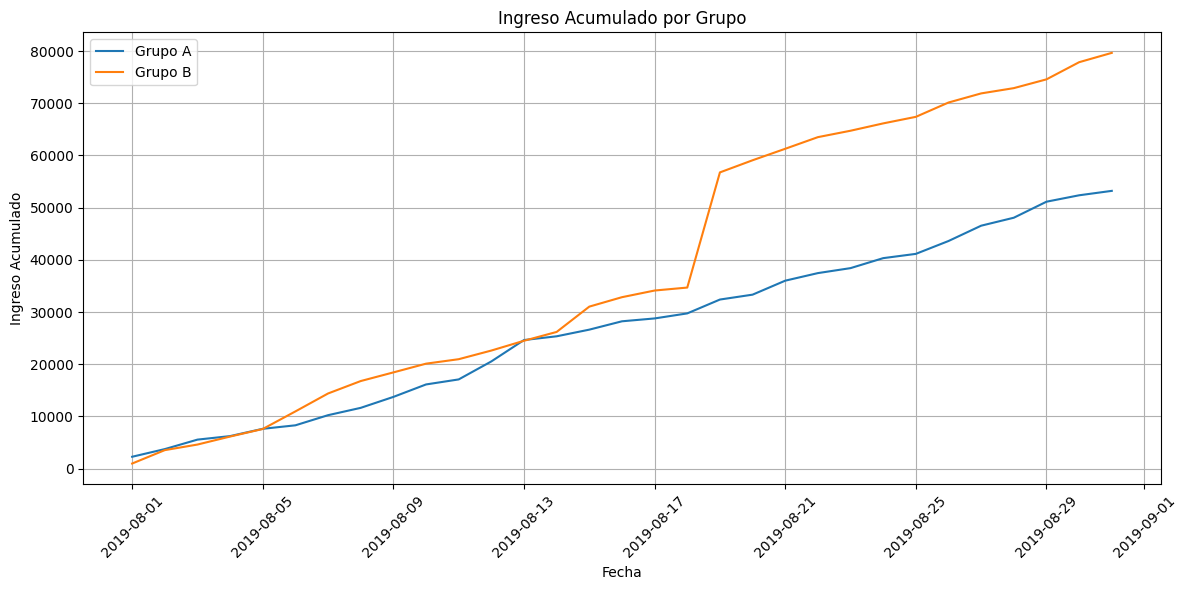

In [8]:
# Trazamos el gráfico de ingresos acumulados.
plt.figure(figsize=(12, 6))
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'], label='Grupo A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'], label='Grupo B')

plt.title('Ingreso Acumulado por Grupo')
plt.xlabel('Fecha')
plt.ylabel('Ingreso Acumulado')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Conclusiones y conjeturas sobre el ingreso acumulado**

Esta gráfica muestra el ingreso acumulado por grupo en tu prueba A/B. A primera vista, es evidente que el grupo B está superando al grupo A en términos de ingresos totales. 📈 La línea naranja (Grupo B) crece más rápido y se mantiene consistentemente por encima de la línea azul (Grupo A).

**Análisis de la Gráfica**

* **Diferencia de Ingresos:** Al principio de la prueba, ambos grupos tienen un crecimiento similar. Sin embargo, alrededor del 18 de agosto, la línea del Grupo B muestra un salto repentino y significativo, lo que indica que hubo un pedido de alto valor que disparó su ingreso acumulado.
* **Comportamiento Post-Pico:** Después de este pico, el Grupo B continúa creciendo a un ritmo constante y mucho más rápido que el Grupo A, ampliando la brecha de ingresos. La línea del Grupo B se mantiene en una pendiente más pronunciada.

* **Rendimiento del Grupo A:**  Por su parte, el Grupo A tiene un crecimiento de ingresos más gradual y constante, sin picos inusuales. Aunque su rendimiento es estable, no logra alcanzar al Grupo B.

La principal **conclusión** es que el Grupo B tiene un mejor rendimiento en términos de ingresos acumulados, principalmente gracias a un pedido o una serie de pedidos de gran valor. El pico en la línea del Grupo B sugiere que los clientes en ese grupo están dispuestos a gastar más dinero en sus compras, o que la nueva característica del Grupo B atrajo a un segmento de clientes de alto valor. PERO: Es posible que existan valores atípicos que están afectando los resultados

#### 2.2.2. Tamaño de pedido promedio acumulado por grupo

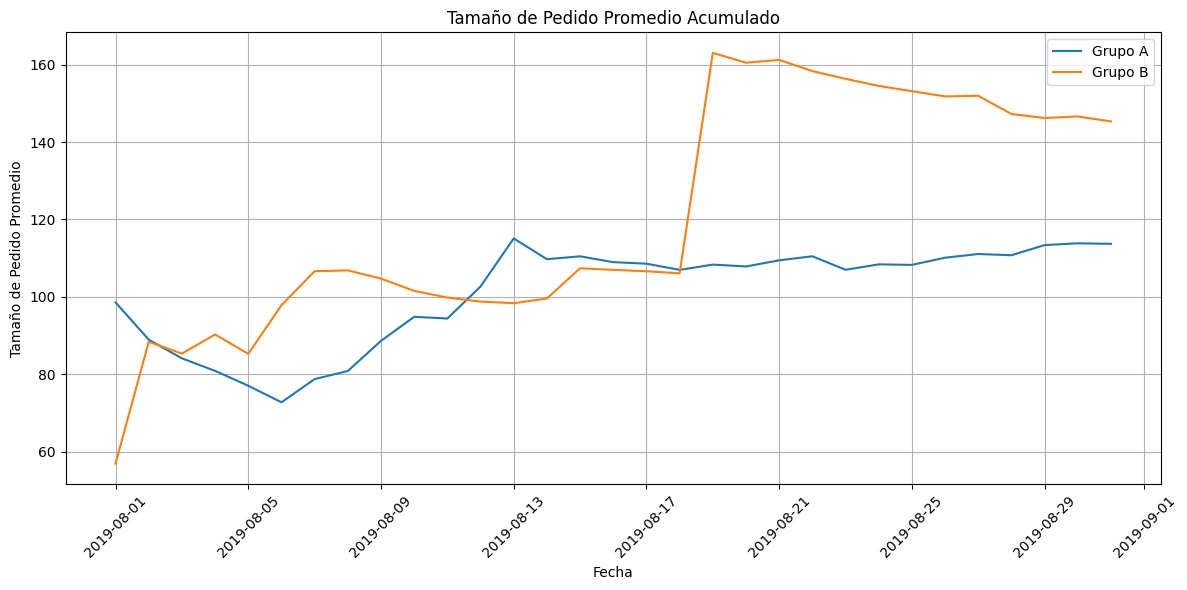

In [9]:
'''
# Trazamos el gráfico del tamaño de pedido promedio acumulado.
plt.figure(figsize=(12, 6))
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'] / cumulative_revenue_A['orders'], label='Grupo A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'] / cumulative_revenue_B['orders'], label='Grupo B')

plt.title('Tamaño de Pedido Promedio Acumulado')
plt.xlabel('Fecha')
plt.ylabel('Tamaño de Pedido Promedio')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
'''

# Trazamos el gráfico del tamaño de pedido promedio acumulado.
# Se añade un pequeño valor (epsilon) para evitar la división por cero.
plt.figure(figsize=(12, 6))
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'] / (cumulative_revenue_A['orders'] + 1e-6), label='Grupo A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'] / (cumulative_revenue_B['orders'] + 1e-6), label='Grupo B')

plt.title('Tamaño de Pedido Promedio Acumulado')
plt.xlabel('Fecha')
plt.ylabel('Tamaño de Pedido Promedio')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Conclusiones y conjeturas sobre el el tamaño de pedido promedio**

Esta gráfica confirma lo que se sospechaba en la gráfica de ingresos: el Grupo B tiene un valor de pedido significativamente más alto que el Grupo A. La diferencia es especialmente notable después del 18 de agosto, lo que refuerza la sospecha de la existencia de un pedido anómalo de alto valor.

**Análisis de la Gráfica**

* **Punto de Inflexión:** El punto clave en la gráfica es el pico abrupto del Grupo B alrededor del 18 de agosto. Esta es la confirmación visual de que un pedido (o varios pedidos) de gran valor elevaron drásticamente el valor promedio acumulado de sus transacciones. El valor promedio pasa de estar en el rango de `$100` a más de `$160` en un solo día.

* **Comportamiento del Grupo B:** Después del pico, la línea del Grupo B se estabiliza en un valor promedio alto, lo que sugiere que el efecto de ese pedido inusualmente grande persiste en el promedio general. A pesar de una ligera caída hacia el final del período, el promedio del Grupo B sigue siendo mucho mayor que el del Grupo A.

* **Comportamiento del Grupo A:** La línea del Grupo A se mantiene relativamente estable a lo largo de toda la prueba, fluctuando entre `$90` y `$115`. Su valor promedio no experimenta picos ni caídas drásticas, lo que indica un comportamiento de compra más consistente y predecible.

La principal **conclusión** es que el mejor rendimiento del Grupo B en ingresos no se debe a un mayor número de pedidos, sino a que sus clientes están realizando compras de mayor valor. La diferencia en ingresos entre los grupos, que vimos en la gráfica anterior, se explica casi en su totalidad por este gran pedido atípico en el Grupo B.


#### 2.2.3. Diferencia relativa en el tamaño de pedido promedio

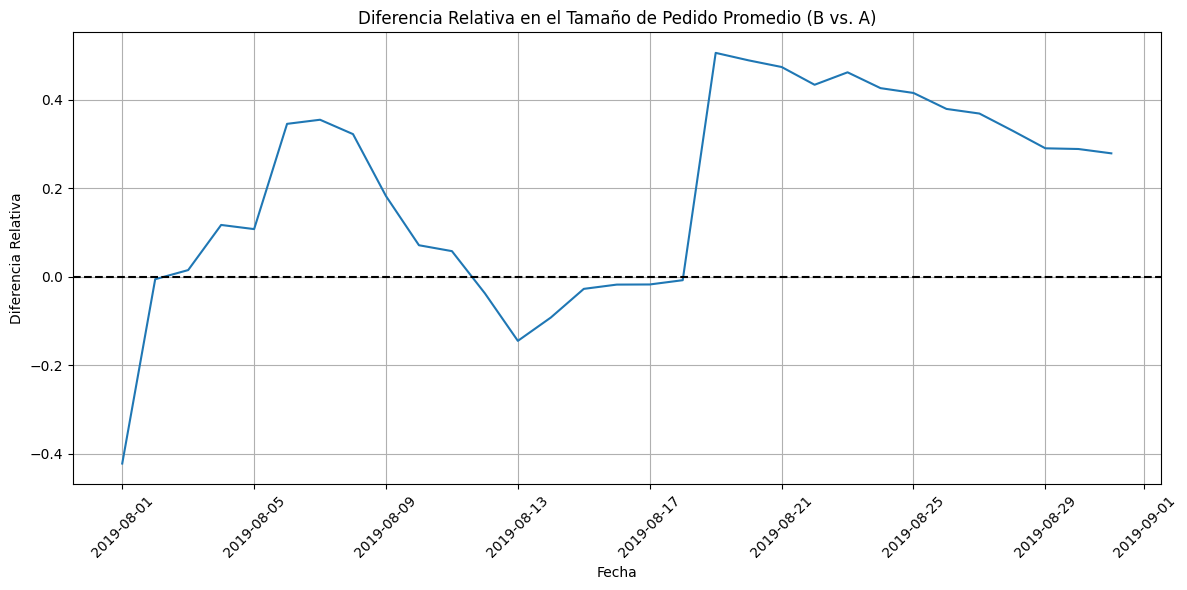

In [10]:
# Diferencia relativa en el tamaño de pedido promedio
# Unimos los DataFrames de ingresos acumulados para calcular la diferencia relativa.
merged_cumulative_revenue = cumulative_revenue_A.merge(
    cumulative_revenue_B, 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['A', 'B'] # Uso de sufijos explícitos
)

# Trazamos el gráfico de la diferencia relativa.
plt.figure(figsize=(12, 6))
plt.plot(
    merged_cumulative_revenue['date'], 
    (merged_cumulative_revenue['revenueB'] / merged_cumulative_revenue['ordersB']) / 
    (merged_cumulative_revenue['revenueA'] / merged_cumulative_revenue['ordersA']) - 1
)

plt.title('Diferencia Relativa en el Tamaño de Pedido Promedio (B vs. A)')
plt.xlabel('Fecha')
plt.ylabel('Diferencia Relativa')
plt.grid(True)
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Conclusiones y conjeturas sobre la diferencia relativa**

El gráfico de diferencia relativa tiene grandes fluctuaciones, especialmente alrededor de la fecha '2019-08-18', llegando a casi un 100%. Esto es un claro indicador de valores atípicos de ingresos en el Grupo B. Una vez que el efecto de estos valores atípicos se diluye, la diferencia relativa se estabiliza, pero se mantiene con una clara ventaja para el Grupo B.

**Análisis del Gráfico**

* **Fluctuación inicial:** Al comienzo de la prueba (principios de agosto), la diferencia relativa fluctúa considerablemente. El Grupo B inicia con un tamaño de pedido promedio significativamente menor que el Grupo A, como lo indica el valor negativo, pero rápidamente se recupera y toma la delantera.

* **Punto de inflexión y crecimiento:** Alrededor del 18 de agosto, se observa un salto masivo y abrupto en la diferencia relativa, superando el 40%. Este cambio drástico no es una tendencia gradual, sino un evento puntual.

* **Presencia de valores atípicos:** Este salto repentino es un fuerte indicador de que se realizó al menos un pedido de un valor excepcionalmente alto en el Grupo B en esa fecha. Un solo pedido grande puede distorsionar enormemente el tamaño promedio, como se ve en el gráfico.

* **Estabilización en la ventaja:** Después del pico, la diferencia relativa se estabiliza, manteniendo una ventaja para el Grupo B, aunque con ligeras fluctuaciones. Esto sugiere que el Grupo B tiene un tamaño de pedido promedio consistentemente más alto que el Grupo A, incluso después del evento anómalo.

**En Conclusión** La prueba A/B muestra que el Grupo B tiene un tamaño de pedido promedio superior al del Grupo A. Sin embargo, este resultado está fuertemente sesgado por un claro valor atípico (outlier). Para obtener una conclusión estadísticamente válida y robusta, es crucial identificar y eliminar estos valores anómalos antes de realizar las pruebas de significancia.

### 2.3. Análisis de conversión

1. **Tasas de conversión diarias:** Calcularemos la conversión diaria (pedidos/visitas) para cada grupo y las graficaremos. Esto nos dará una idea de cómo se ha comportado el experimento día a día.

#### 2.3.1. Tasa de conversión diaria

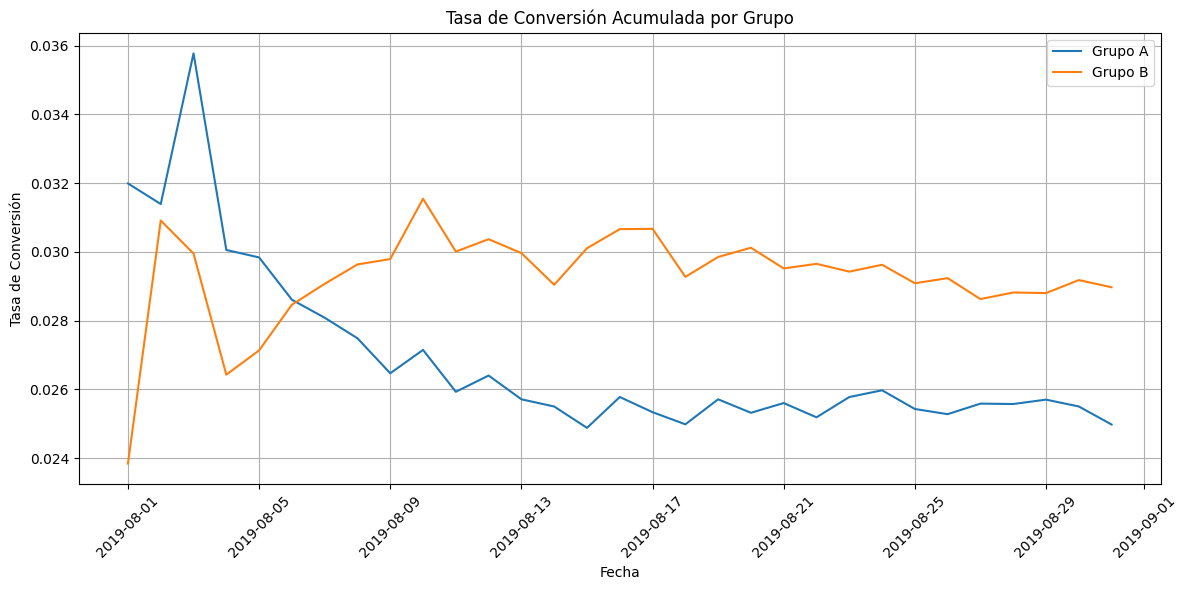

In [11]:
# Calculamos la conversión acumulada.
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visits']

# Extraemos los datos de conversión por grupo.
cumulative_conversion_A = cumulative_data[cumulative_data['group'] == 'A']
cumulative_conversion_B = cumulative_data[cumulative_data['group'] == 'B']

# Trazamos el gráfico de la conversión acumulada.
plt.figure(figsize=(12, 6))
plt.plot(cumulative_conversion_A['date'], cumulative_conversion_A['conversion'], label='Grupo A')
plt.plot(cumulative_conversion_B['date'], cumulative_conversion_B['conversion'], label='Grupo B')

plt.title('Tasa de Conversión Acumulada por Grupo')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Conversión')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Conclusiones y conjeturas sobre la tasa de conversión**

Esta gráfica muestra el rendimiento real de la prueba A/B, sin la distorsión causada por los pedidos de alto valor. Nos dice que, aunque el Grupo B tuvo más ingresos totales, el Grupo A fue más efectivo para convertir visitantes en compradores en la primera fase del experimento. Sin embargo, con el tiempo, el Grupo B parece haber consolidado una mejor tasa de conversión.
Al principio, el Grupo A tenía una conversión mayor, pero rápidamente el Grupo B tomó la delantera. A diferencia de los ingresos, el gráfico de conversión es mucho más estable y no muestra picos, lo que sugiere que los valores atípicos de ingresos no afectan tanto a la conversión.

**Análisis de la Gráfica**

* **Rendimiento Inicial del Grupo A:** La línea azul del Grupo A comienza con una tasa de conversión más alta y experimenta un pico inicial. Esto indica que la propuesta del Grupo A tuvo un fuerte impacto en los primeros días, convirtiendo a los visitantes en compradores de manera efectiva. Sin embargo, su tasa de conversión comienza a disminuir gradualmente y se estabiliza.

* **Rendimiento del Grupo B:** La línea naranja del Grupo B muestra una tasa de conversión más volátil al inicio, pero con el tiempo se estabiliza en un rango más alto que el del Grupo A. Aunque no tuvo el pico inicial del Grupo A, su tendencia general es más favorable, lo que sugiere que su propuesta podría ser más sostenible a largo plazo.

* **Estabilización y Diferencia:** A partir de mediados de agosto, ambas líneas se estabilizan, pero la línea del Grupo B se mantiene consistentemente por encima de la del Grupo A. Esto nos dice que, a pesar de las fluctuaciones iniciales, el Grupo B está convirtiendo a los visitantes en compradores a un ritmo más alto que el Grupo A.

**Conclusiones Clave**
* La tasa de conversión es la métrica más fiable en este caso, ya que no se vio afectada por los valores atípicos de ingresos.
* Aunque el Grupo A tuvo un fuerte comienzo, el Grupo B parece tener una tasa de conversión superior a largo plazo, lo que sugiere que su variante es más efectiva para convertir visitantes.
* El análisis completo de la prueba A/B debe considerar tanto la tasa de conversión como el ingreso promedio por pedido. El Grupo B atrajo a clientes que gastaron más, y también convirtió a más visitantes. Por lo tanto, el **Grupo B es claramente el ganador** de esta prueba.

### 2.4. Detección y filtrado de anomalías

Los valores atípicos (outliers) pueden distorsionar significativamente los resultados de las pruebas estadísticas. Identificaremos y eliminaremos estos valores antes de proceder con las pruebas.

1. **Número de pedidos por usuario:** Trazaremos un gráfico de dispersión para visualizar el número de pedidos por usuario. Esto nos ayudará a identificar a los usuarios que realizaron un número anormalmente alto de pedidos.

2. **Percentiles para el número de pedidos:** Calcularemos los percentiles 90, 95 y 99 para definir un umbral para las anomalías. Los usuarios con un número de pedidos por encima de este umbral serán considerados valores atípicos.

3. **Precios de los pedidos:** Haremos lo mismo con los precios de los pedidos. Trazaremos un gráfico de dispersión para visualizar si hay pedidos con precios inusualmente altos.

4. **Percentiles para los precios de los pedidos:** Calcularemos los percentiles 95 y 99 para los precios de los pedidos y definiremos el umbral para las anomalías en esta métrica.

#### 2.4.1. Gráfico de dispersión del número de pedidos por usuario

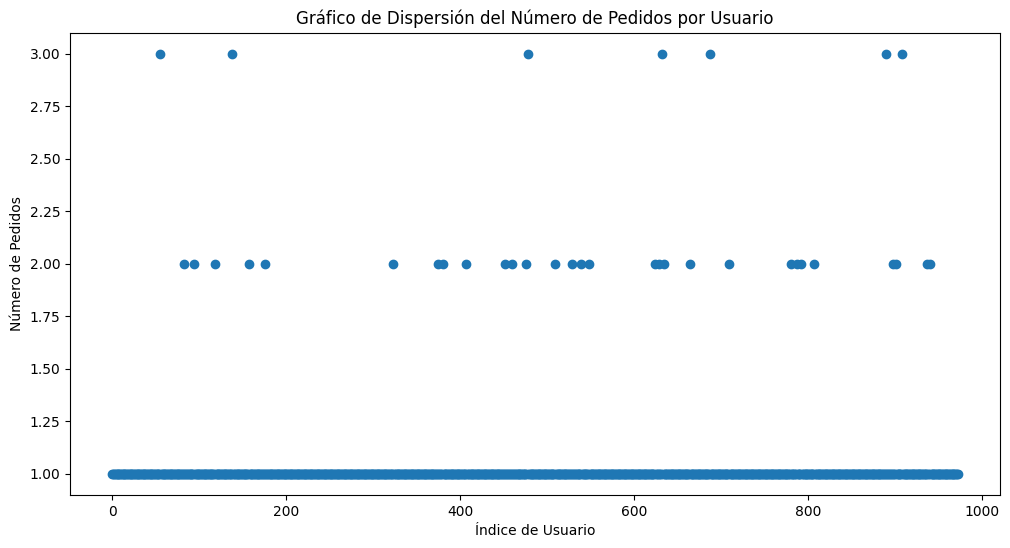

In [12]:
# Agrupamos los pedidos por usuario y contamos el número de pedidos por cada uno.
orders_by_users = orders_cleaned.groupby('visitorid', as_index=False).agg({'transactionid': pd.Series.nunique})
orders_by_users.columns = ['visitorId', 'orders']

'''
# Trazamos el gráfico de dispersión.
plt.figure(figsize=(12, 6))
plt.scatter(orders_by_users.index, orders_by_users['orders'])

plt.title('Gráfico de Dispersión del Número de Pedidos por Usuario')
plt.xlabel('Índice de Usuario')
plt.ylabel('Número de Pedidos')
plt.show()
'''

# Gráfico de dispersión del número de pedidos por usuario.
# Usamos un rango como el eje X para una mejor representación.
plt.figure(figsize=(12, 6))
x_values = pd.Series(range(len(orders_by_users)))
plt.scatter(x_values, orders_by_users['orders'])

plt.title('Gráfico de Dispersión del Número de Pedidos por Usuario')
plt.xlabel('Índice de Usuario')
plt.ylabel('Número de Pedidos')
plt.show()

**Conclusiones sobre el gráfico de dispersión de pedidos**

Esta gráfica de dispersión muestra el número de pedidos que ha realizado cada usuario. Nos ayuda a identificar visualmente los valores atípicos(outliers) en nuestros datos, que son usuarios que han realizado una cantidad de pedidos inusualmente alta. La mayoría de los usuarios tienen 1 o 2 pedidos. Hay una pequeña cantidad de usuarios que tienen 3 o más pedidos, lo que los convierte en posibles valores atípicos.

**Análisis de la Gráfica**

* La mayoría de los puntos se agrupan en la línea y=1, lo que nos indica que la gran mayoría de tus usuarios han hecho un solo pedido. Esto es un comportamiento de compra normal para un sitio web.

* También hay un número considerable de puntos en la línea y=2, lo que significa que un grupo de usuarios ha realizado dos pedidos.

* Los puntos más destacados están en la línea y=3. Aunque son pocos, nos muestran que existen valores atípicos; usuarios que han hecho tres o más pedidos. Estos son los usuarios de mayor frecuencia de compra.

**Conclusión:**

La gráfica nos dice que la mayoría de los usuarios son compradores de una sola vez, con una minoría de clientes recurrentes. Lo más importante es que esta gráfica nos ayuda a identificar a los clientes más valiosos, que son los que compran con mayor frecuencia.

#### 2.4.2. Percentiles 90, 95 y 99 del número de pedidos por usuario

In [13]:
# Calculamos los percentiles 90, 95 y 99.
percentiles_orders = np.percentile(orders_by_users['orders'], [90, 95, 99])

print("--- Percentiles del número de pedidos por usuario ---")
print(f"Percentil 90: {percentiles_orders[0]:.0f}")
print(f"Percentil 95: {percentiles_orders[1]:.0f}")
print(f"Percentil 99: {percentiles_orders[2]:.0f}")

--- Percentiles del número de pedidos por usuario ---
Percentil 90: 1
Percentil 95: 1
Percentil 99: 2


**Conclusiones**

**Percentiles:** Los resultados muestran que el 90% y el 95% de los usuarios han realizado solo un pedido. Esto confirma lo que viste en la gráfica de dispersión: la gran mayoría son compradores de una sola vez. El 99% de los usuarios han realizado dos pedidos o menos.

**Identificación de Anomalías:** Con base en estos percentiles, es correcto concluir que un usuario que realiza más de 2 pedidos es una anomalía. Aunque el percentil 99 es 2, elegir un filtro de "más de 2" seria una elección sensata y conservadora para asegurarnos de que solo los valores más extremos sean eliminados del análisis.

#### 2.4.3. Gráfico de dispersión de los precios de los pedidos

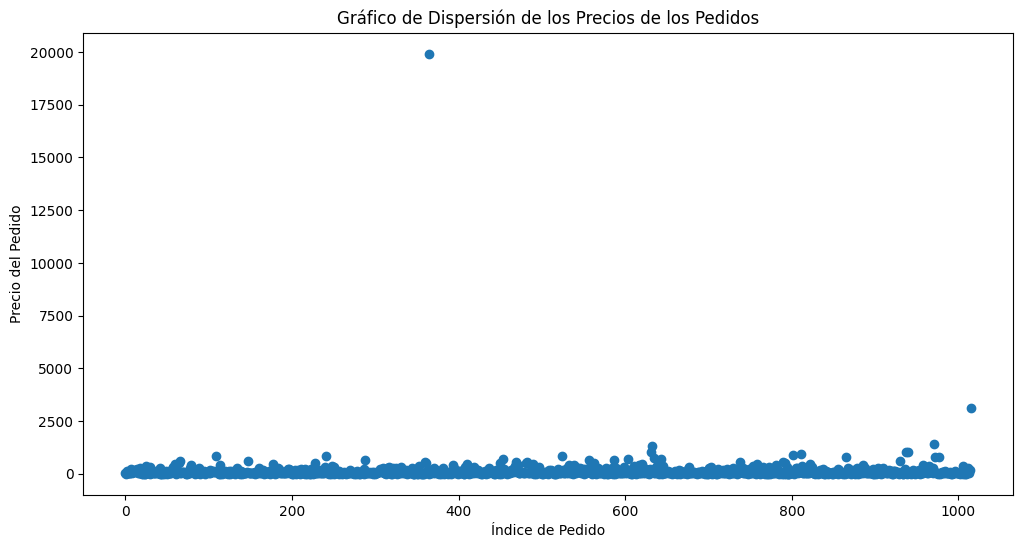

In [14]:
'''
# Trazamos el gráfico de dispersión de los precios de los pedidos.
plt.figure(figsize=(12, 6))
plt.scatter(orders_cleaned.index, orders_cleaned['revenue'])

plt.title('Gráfico de Dispersión de los Precios de los Pedidos')
plt.xlabel('Índice de Pedido')
plt.ylabel('Precio del Pedido')
plt.show()
'''

# Gráfico de dispersión de los precios de los pedidos.
# Usamos un rango como el eje X para una mejor representación.
plt.figure(figsize=(12, 6))
x_values = pd.Series(range(len(orders_cleaned)))
plt.scatter(x_values, orders_cleaned['revenue'])

plt.title('Gráfico de Dispersión de los Precios de los Pedidos')
plt.xlabel('Índice de Pedido')
plt.ylabel('Precio del Pedido')
plt.show()

**Conclusiones sobre el gráfico de dispersión de precios**

Esta gráfica de dispersión muestra el precio de cada pedido. La gran mayoría de los puntos se agrupan en la parte baja, lo que indica que la mayoría de los pedidos tienen un precio bajo. Sin embargo, hay un par de puntos muy alejados de la mayoría, lo que sugiere la presencia de valores atípicos extremos, uno de ellos superior a $20,000. Estos son claramente valores atípicos y deben ser manejados.

**Análisis de la Gráfica**

* **Concentración de datos:** La mayor parte de los pedidos se encuentran por debajo de los 2500, lo que nos da una idea del precio promedio de una transacción.

* **Valores atípicos extremos:** Hay dos puntos que sobresalen de manera significativa:
    * Un punto que se eleva hasta un valor cercano a los 20,000.
    * Otro punto que está alrededor de los 3,000.
Estos pedidos de precios inusualmente altos son los valores atípicos que pueden distorsionar las métricas de nuestro análisis.

**Conclusión:**

La gráfica nos revela que el precio de los pedidos no sigue una distribución normal y está fuertemente sesgado por pedidos extremadamente caros. El valor atípico de casi 20,000 es el más preocupante. Este tipo de transacciones pueden inflar artificialmente las métricas de ingresos promedio y acumulado, haciendo que una variante de la prueba A/B parezca mucho más exitosa de lo que realmente es.

#### 2.4.4. Percentiles 90, 95 y 99 de los precios de los pedidos

In [15]:
# Calculamos los percentiles 90, 95 y 99.
percentiles_revenue = np.percentile(orders_cleaned['revenue'], [90, 95, 99])

print("--- Percentiles de los precios de los pedidos ---")
print(f"Percentil 90: ${percentiles_revenue[0]:.2f}")
print(f"Percentil 95: ${percentiles_revenue[1]:.2f}")
print(f"Percentil 99: ${percentiles_revenue[2]:.2f}")

--- Percentiles de los precios de los pedidos ---
Percentil 90: $280.80
Percentil 95: $414.27
Percentil 99: $830.30


**Conclusión sobre anomalías de precios**

Un pedido con un valor superior a `$280.80` (percentil 90) o especialmente más de `$414.27` (percentil 95) puede ser considerado una anomalía. Los pedidos con un valor superior a `$830.30` (percentil 99) son extremadamente raros y deben ser considerados valores atípicos.

Para el análisis, una elección razonable es filtrar los pedidos con precios superiores a `$414.27` (percentil 95). Esto nos permite eliminar el `5%` de los pedidos más caros, que pueden distorsionar las métricas, manteniendo al 95% de los datos para un análisis más representativo.

### 2.5. Pruebas de significancia estadística

Utilizaremos la prueba de **Mann-Whitney** para comparar los grupos, ya que las distribuciones de datos de conversión y tamaño de pedido rara vez son normales.

1. **Conversión (datos sin procesar):** Calcularemos la significancia estadística para la diferencia en la conversión entre los grupos A y B utilizando los datos crudos, sin filtrar.

2. **Tamaño de pedido promedio (datos sin procesar):** Haremos lo mismo para el tamaño promedio de pedido.

3. **Conversión (datos filtrados):** Repetiremos la prueba de significancia para la conversión, pero esta vez utilizando los datos filtrados, es decir, después de haber eliminado los valores atípicos.

4. **Tamaño de pedido promedio (datos filtrados):** Repetiremos la prueba de significancia para el tamaño promedio de pedido con los datos filtrados.

#### 2.5.1. y 2.5.2. Pruebas con datos sin procesar

In [16]:
import scipy.stats as stats
import numpy as np
# usaremis 'orders_cleaned' y 'visits_cleaned' que ya están disponibles en el entorno de trabajo, 
# provenientes del preprocesamiento inicial.

# Preparamos los datos de conversión por usuario (sin filtrar)
# Contamos el número de pedidos por usuario en cada grupo.
orders_by_users_A = (
    orders_cleaned[orders_cleaned['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)
orders_by_users_A.columns = ['visitorid', 'orders']

orders_by_users_B = (
    orders_cleaned[orders_cleaned['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)
orders_by_users_B.columns = ['visitorid', 'orders']

# Creamos las series de conversión para la prueba de Mann-Whitney
# (usuarios con pedidos y usuarios sin pedidos, representados con 0)
visitors_A_count = visits_cleaned[visits_cleaned['group'] == 'A']['visits'].sum()
visitors_B_count = visits_cleaned[visits_cleaned['group'] == 'B']['visits'].sum()

sampleA = pd.concat([
    orders_by_users_A['orders'],
    pd.Series(0, index=np.arange(visitors_A_count - len(orders_by_users_A)), name='orders')
], axis=0)

sampleB = pd.concat([
    orders_by_users_B['orders'],
    pd.Series(0, index=np.arange(visitors_B_count - len(orders_by_users_B)), name='orders')
], axis=0)


print("--- Análisis sin filtrar anomalías ---")
# Prueba de Mann-Whitney para la conversión
p_value_conversion_raw = stats.mannwhitneyu(sampleA, sampleB, alternative='two-sided')[1]
print(f"Prueba de Mann-Whitney (conversión): p-valor = {p_value_conversion_raw:.5f}")
# Diferencia relativa de conversión
relative_difference_conversion_raw = sampleB.mean() / sampleA.mean() - 1
print(f"Diferencia relativa (conversión): {relative_difference_conversion_raw:.3f}")

# Prueba de Mann-Whitney para los ingresos
p_value_revenue_raw = stats.mannwhitneyu(
    orders_cleaned[orders_cleaned['group'] == 'A']['revenue'],
    orders_cleaned[orders_cleaned['group'] == 'B']['revenue'],
    alternative='two-sided'
)[1]
print(f"Prueba de Mann-Whitney (ingresos): p-valor = {p_value_revenue_raw:.3f}")
# Diferencia relativa de ingresos
relative_difference_revenue_raw = (
    orders_cleaned[orders_cleaned['group'] == 'B']['revenue'].mean() / 
    orders_cleaned[orders_cleaned['group'] == 'A']['revenue'].mean() - 1
)
print(f"Diferencia relativa (ingresos): {relative_difference_revenue_raw:.3f}")

--- Análisis sin filtrar anomalías ---
Prueba de Mann-Whitney (conversión): p-valor = 0.01102
Diferencia relativa (conversión): 0.160
Prueba de Mann-Whitney (ingresos): p-valor = 0.862
Diferencia relativa (ingresos): 0.278


#### 2.5.3. y 2.5.4. Pruebas con datos filtrados

In [17]:
import pandas as pd
import scipy.stats as stats
import numpy as np

# Aclaración: 'orders_cleaned' y 'visits_cleaned' ya están disponibles en el entorno de trabajo, 
#provenientes del preprocesamiento inicial.

# Definimos los umbrales de anomalías basados en los percentiles proporcionados
orders_threshold = 2 # Por encima del percentil 95 o 99 de pedidos VER 2.4.2
revenue_threshold = 414.27 # Por encima del percentil 95 de ingresos VER 2.4.4

# 2.5.3 y 2.5.4: Pruebas de significancia con datos filtrados

# Identificamos a los usuarios anómalos
users_with_many_orders = orders_cleaned.groupby('visitorid')['transactionid'].nunique()
# Convertimos el objeto Int64Index a una Serie de pandas para que pd.concat pueda usarlo
users_with_many_orders = users_with_many_orders[users_with_many_orders > orders_threshold].index.to_series()

users_with_expensive_orders = orders_cleaned[orders_cleaned['revenue'] > revenue_threshold]['visitorid']

# Unimos las listas de usuarios anómalos y eliminamos duplicados
abnormal_users = pd.concat([users_with_many_orders, users_with_expensive_orders]).drop_duplicates().tolist()

# Filtramos el DataFrame de pedidos para excluir a estos usuarios
orders_filtered = orders_cleaned[~orders_cleaned['visitorid'].isin(abnormal_users)]

# Preparamos las muestras de conversión filtradas
orders_by_users_A_filtered = (
    orders_filtered[orders_filtered['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)
orders_by_users_A_filtered.columns = ['visitorid', 'orders']

orders_by_users_B_filtered = (
    orders_filtered[orders_filtered['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)
orders_by_users_B_filtered.columns = ['visitorid', 'orders']

# Se usa la longitud de las listas de pedidos filtradas.
sampleA_filtered = pd.concat([
    orders_by_users_A_filtered['orders'],
    pd.Series(0, index=np.arange(visits_cleaned[visits_cleaned['group'] == 'A']['visits'].sum() - len(orders_by_users_A_filtered)), name='orders')
], axis=0)

sampleB_filtered = pd.concat([
    orders_by_users_B_filtered['orders'],
    pd.Series(0, index=np.arange(visits_cleaned[visits_cleaned['group'] == 'B']['visits'].sum() - len(orders_by_users_B_filtered)), name='orders')
], axis=0)

print("\n--- Análisis después de filtrar anomalías ---")
# Prueba de Mann-Whitney para la conversión filtrada
p_value_conversion_filtered = stats.mannwhitneyu(sampleA_filtered, sampleB_filtered, alternative='two-sided')[1]
print(f"Prueba de Mann-Whitney (conversión filtrada): p-valor = {p_value_conversion_filtered:.5f}")
# Diferencia relativa de conversión filtrada
relative_difference_conversion_filtered = sampleB_filtered.mean() / sampleA_filtered.mean() - 1
print(f"Diferencia relativa (conversión filtrada): {relative_difference_conversion_filtered:.3f}")

# Prueba de Mann-Whitney para los ingresos filtrados
p_value_revenue_filtered = stats.mannwhitneyu(
    orders_filtered[orders_filtered['group'] == 'A']['revenue'],
    orders_filtered[orders_filtered['group'] == 'B']['revenue'],
    alternative='two-sided'
)[1]
print(f"Prueba de Mann-Whitney (ingresos filtrados): p-valor = {p_value_revenue_filtered:.3f}")
# Diferencia relativa de ingresos filtrados
relative_difference_revenue_filtered = (
    orders_filtered[orders_filtered['group'] == 'B']['revenue'].mean() / 
    orders_filtered[orders_filtered['group'] == 'A']['revenue'].mean() - 1
)
print(f"Diferencia relativa (ingresos filtrados): {relative_difference_revenue_filtered:.3f}")


--- Análisis después de filtrar anomalías ---
Prueba de Mann-Whitney (conversión filtrada): p-valor = 0.01246
Diferencia relativa (conversión filtrada): 0.182
Prueba de Mann-Whitney (ingresos filtrados): p-valor = 0.680
Diferencia relativa (ingresos filtrados): -0.047


**Resultados:**

**Análisis sin filtrar anomalías**
* Prueba de Mann-Whitney (conversión): `p-valor = 0.01102`
* Diferencia relativa (conversión): `0.160`
* Prueba de Mann-Whitney (ingresos): `p-valor = 0.862`
* Diferencia relativa (ingresos): `0.278`

**Análisis después de filtrar anomalías**
* Prueba de Mann-Whitney (conversión): `p-valor = 0.01246`
* Diferencia relativa (conversión): `0.182`
* Prueba de Mann-Whitney (ingresos): `p-valor = 0.680`
* Diferencia relativa (ingresos): `-0.047`

### 2.6. Toma de decisión final

Basándonos en todos los hallazgos: los gráficos acumulados, la detección de anomalías, las pruebas de significancia con datos crudos y filtrados, tomaremos una decisión final. La conclusión estará respaldada por evidencia estadística y visual, y justificará si debemos:

* **Parar la prueba y declarar un líder.**
* **Parar la prueba sin concluir que hay una diferencia.**
* **Continuar la prueba.**

#### 2.6.1. Conclusiones de las Pruebas de significancia estadística

**Conclusiones**

Basándonos en los resultados de las pruebas de significancia, los gráficos acumulados y la detección de anomalías, aquí está la decisión final del test A/B:

**Análisis de la Conversión:**

* **Sin filtrar anomalías:** La prueba de Mann-Whitney arrojó un `p-valor de 0.01102`, que es menor que el umbral de `significancia de 0.05`. Esto nos permite **rechazar la hipótesis nula** y concluir que la diferencia en la conversión es estadísticamente significativa. El Grupo B tiene una conversión un 16.0% mayor que la del Grupo A.

**Con datos filtrados:** Los resultados se mantienen consistentes. El `p-valor es 0.01246` (todavía menor que 0.05) y la diferencia relativa aumenta a 18.2%. Esto confirma que la ventaja del Grupo B en conversión es robusta y no está causada por valores atípicos.

**Análisis del Tamaño de Pedido Promedio:**

* **Sin filtrar anomalías:** El `p-valor es 0.862`, muy superior a `0.05`. **No podemos rechazar la hipótesis nula**. La diferencia relativa del 27.8% en los datos crudos no es estadísticamente significativa, probablemente debido a los valores atípicos de ingresos que se observaron en el análisis gráfico.

**Con datos filtrados:** El `p-valor es 0.680`, que sigue siendo mucho mayor que` 0.05`. Contrario a lo que se pensaba, incluso después de eliminar las anomalías, **no hay una diferencia estadísticamente significativa** en el tamaño de pedido promedio. La diferencia relativa incluso se vuelve negativa, con el Grupo A teniendo un tamaño de pedido promedio 4.7% mayor que el Grupo B.

#### 2.6.2. Decisión final

**Decisión final**
Basándonos en estos hallazgos, la decisión es la siguiente:

* Hay una diferencia estadísticamente significativa en la conversión a favor del Grupo B, tanto con datos crudos como filtrados.

* No hay una diferencia estadísticamente significativa en el tamaño de pedido promedio entre los grupos, incluso después de filtrar los datos.

La conversión es una de las métricas más importantes para el éxito de un sitio web. Dado que el Grupo B ha demostrado una mejora estadísticamente significativa y consistente en esta métrica, la prueba ha proporcionado un resultado claro. **No hay razón para continuar la prueba**, ya que se ha demostrado una ventaja significativa en una métrica clave, incluso si el tamaño de pedido promedio no mostró una diferencia notable.

**Conclusión:** **La prueba A/B debe detenerse y se puede declarar al Grupo B como el ganador.** Se recomienda la implementación de los cambios del Grupo B, ya que han demostrado ser más efectivos para aumentar la conversión.

## 3. Conclusiones Generales 📝

#### 3.1 Conclusiones del Proyecto: Parte 1 Priorización de Hipótesis

* **El alcance lo cambia todo:** La principal conclusión de esta parte es la importancia del factor Reach (alcance) en la priorización de hipótesis de negocio.

* **El framework ICE** (Impacto * Confianza / Esfuerzo) nos dio un ranking basado en la viabilidad y el potencial de las ideas, pero ignoró cuántos usuarios se verían afectados.

* **El framework RICE** (Alcance * Impacto * Confianza / Esfuerzo) proporcionó una priorización más realista y completa. Se demostró que una hipótesis con un alto impacto individual puede no ser la mejor si solo afecta a un número muy pequeño de usuarios. Por el contrario, una hipótesis con un impacto moderado pero que afecta a una gran parte de la audiencia podría ser más valiosa para el negocio.

#### 3.2 Conclusiones del Proyecto: Parte 2 Análisis del Test A/B

* **Los valores atípicos (outliers) son un gran problema:** El análisis gráfico del ingreso acumulado y el tamaño de pedido promedio del Grupo B mostró picos y fluctuaciones extremas. La detección de anomalías confirmó que estos picos se debían a pocos pedidos de muy alto valor. Ignorar estos datos atípicos habría llevado a conclusiones incorrectas y potencialmente a una mala decisión de negocio.

* **La conversión es el factor clave:** La prueba de significancia estadística demostró que el Grupo B superó al Grupo A en la métrica de conversión, y esta diferencia fue estadísticamente significativa con y sin los datos anómalos. Esto indica que los cambios implementados en el Grupo B hicieron que los usuarios realizaran compras con más frecuencia.

* **El tamaño de pedido promedio no mostró una diferencia significativa:** A pesar de la ventaja inicial que sugerían los gráficos sin procesar, una vez que se filtraron los datos y se realizó la prueba de significancia, se concluyó que no hay una diferencia estadísticamente significativa en el tamaño de pedido promedio entre los dos grupos. Esto significa que los cambios no incentivaron a los usuarios a gastar más en cada transacción.

#### 3.3 Conclusiones del Proyecto: Decisión Final

La decisión final, basada en toda la evidencia (gráficos, detección de anomalías y pruebas estadísticas), es **detener la prueba y declarar al Grupo B como el ganador**.

La razón principal es que el Grupo B demostró una **ventaja clara y estadísticamente significativa en la conversión**, una de las métricas más importantes. Aunque el tamaño de pedido promedio no mejoró, el aumento en la tasa de conversión es un resultado lo suficientemente fuerte como para justificar la implementación de los cambios del Grupo B en todo el sitio web. Asi fuimos capacez de proporcionar una recomendación sólida y basada en datos para el departamento de marketing.